# Análisis de los datos obtenidos 

Uso de ipython para el análsis y muestra de los datos obtenidos durante la producción.Se implementa un regulador experto. Los datos analizados son del día 13 de Agosto del 2015

Los datos del experimento:
* Hora de inicio: 10:30
* Hora final : 11:00
* Filamento extruido: 447cm 
* $T: 150ºC$
* $V_{min} tractora: 1.5 mm/s$
* $V_{max} tractora: 3.4 mm/s$
* Los incrementos de velocidades en las reglas del sistema experto son distintas:
    * En los caso 3 y 5 se mantiene un incremento de +2.
    * En los casos 4 y 6 se reduce el incremento a -1.

In [20]:
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [22]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('ensayo4.CSV')

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [24]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X','Diametro Y', 'RPM TRAC']

In [25]:
#Mostramos un resumen de los datos obtenidoss
datos[columns].describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Diametro X,Diametro Y,RPM TRAC
count,1125.000000,1125.000000,1125.000000
mean,1.715315,1.723081,2.449800
std,0.232539,0.240764,0.882116
min,1.011880,1.000236,1.497500
25%,1.516554,1.517422,1.497500
50%,1.723012,1.712803,2.387500
75%,1.883591,1.908185,3.500000
max,2.307976,2.344920,3.500000


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

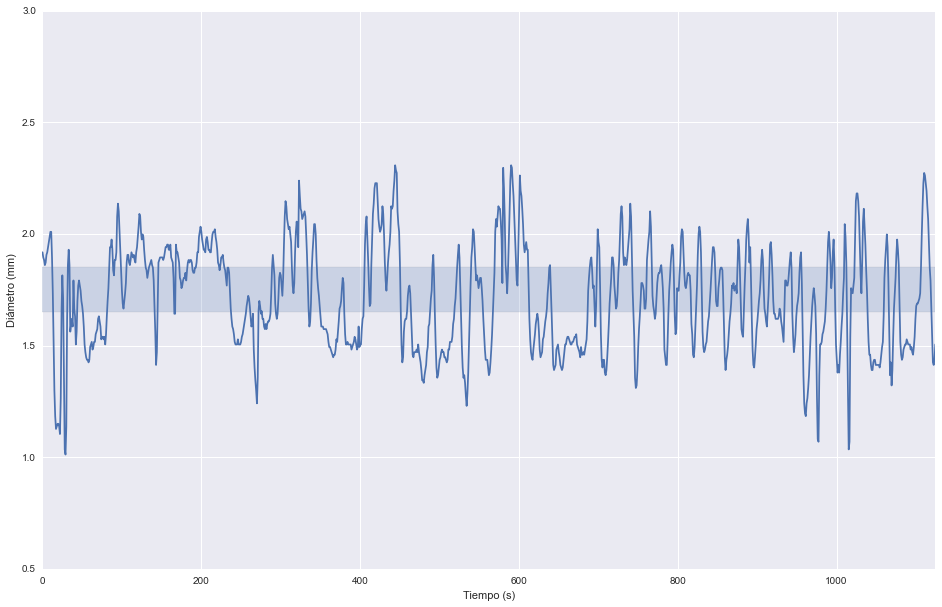

In [26]:
graf = datos.ix[:, "Diametro X"].plot(figsize=(16,10),ylim=(0.5,3))
graf.axhspan(1.65,1.85, alpha=0.2)
graf.set_xlabel('Tiempo (s)')
graf.set_ylabel('Diámetro (mm)')
#datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

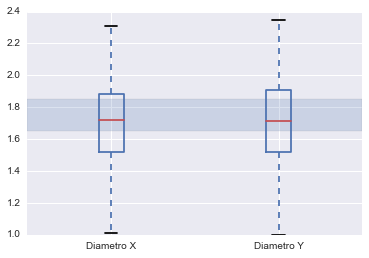

In [27]:
box = datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')
box.axhspan(1.65,1.85, alpha=0.2)

Con esta segunda aproximación se ha conseguido estabilizar los datos. Se va a tratar de bajar ese porcentaje. Como cuarta  aproximación, vamos a  modificar las velocidades de tracción. El rango de velocidades propuesto es de 1.5 a 5.3, manteniendo los incrementos del sistema experto como en el actual ensayo.

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

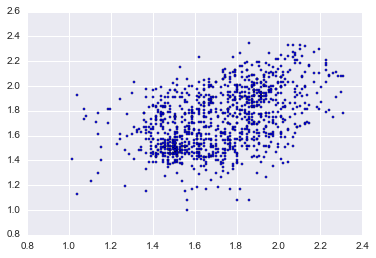

In [28]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [29]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [30]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

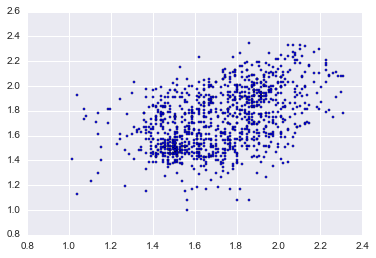

In [31]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [32]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    1125.000000
mean        1.006727
std         0.148785
min         0.535851
25%         0.911347
50%         0.993264
75%         1.091330
max         1.721730
dtype: float64

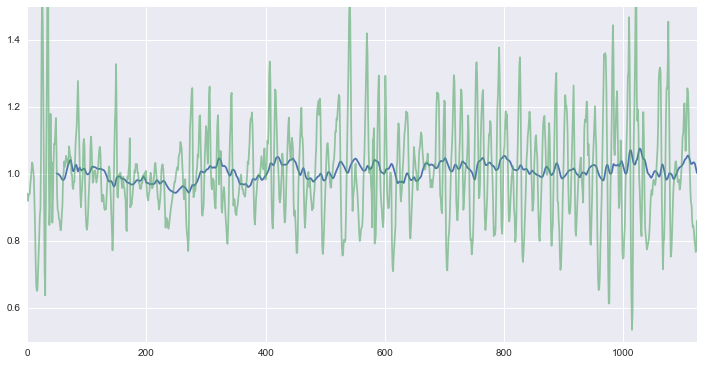

In [33]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [34]:
Th_u = 1.85
Th_d = 1.65

In [35]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [36]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,1058.000000,1058.000000,1058.000000,1058.000000,1058,1058,1058,1058.000000
mean,63.973535,151.231664,1.712236,1.721711,1,1,0,2.434397
std,0.708737,0.791708,0.239010,0.247800,0,0,0,0.883503
min,62.900000,149.500000,1.011880,1.000236,True,True,0,1.497500
25%,63.200000,150.600000,1.516554,1.517422,1,1,0,1.497500
50%,64.100000,151.200000,1.700073,1.701310,1,1,0,2.387500
75%,64.600000,151.800000,1.895061,1.919678,1,1,0,3.500000
max,65.000000,153.200000,2.307976,2.344920,True,True,0,3.500000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x09E1DDF0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x09F4A6D0>], dtype=object)

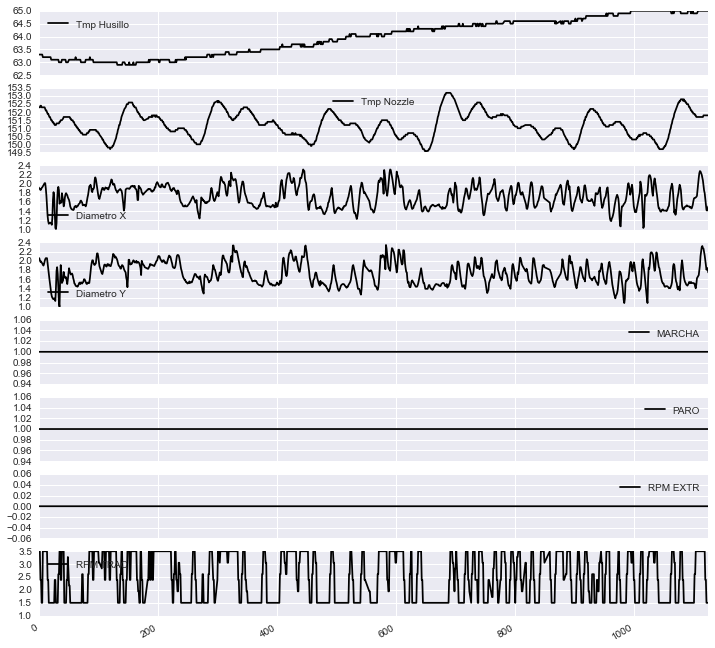

In [37]:
data_violations.plot(subplots=True, figsize=(12,12))